### Set-up

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Plotting
import scienceplots as splots
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import mapclassify as mc

plt.style.use(['science','retro'])

In [2]:
census10 = pd.read_csv(r"D:\Download\Microeconometrics\Replication\1_Replication Package\census10_final.csv")
figure2 = pd.read_csv(r"D:\Download\Microeconometrics\Replication\1_Replication Package\figure2.csv")
figure4 =pd.read_csv(r"D:\Download\Microeconometrics\Replication\1_Replication Package\figure4.csv")

### *keju* Hierarchy

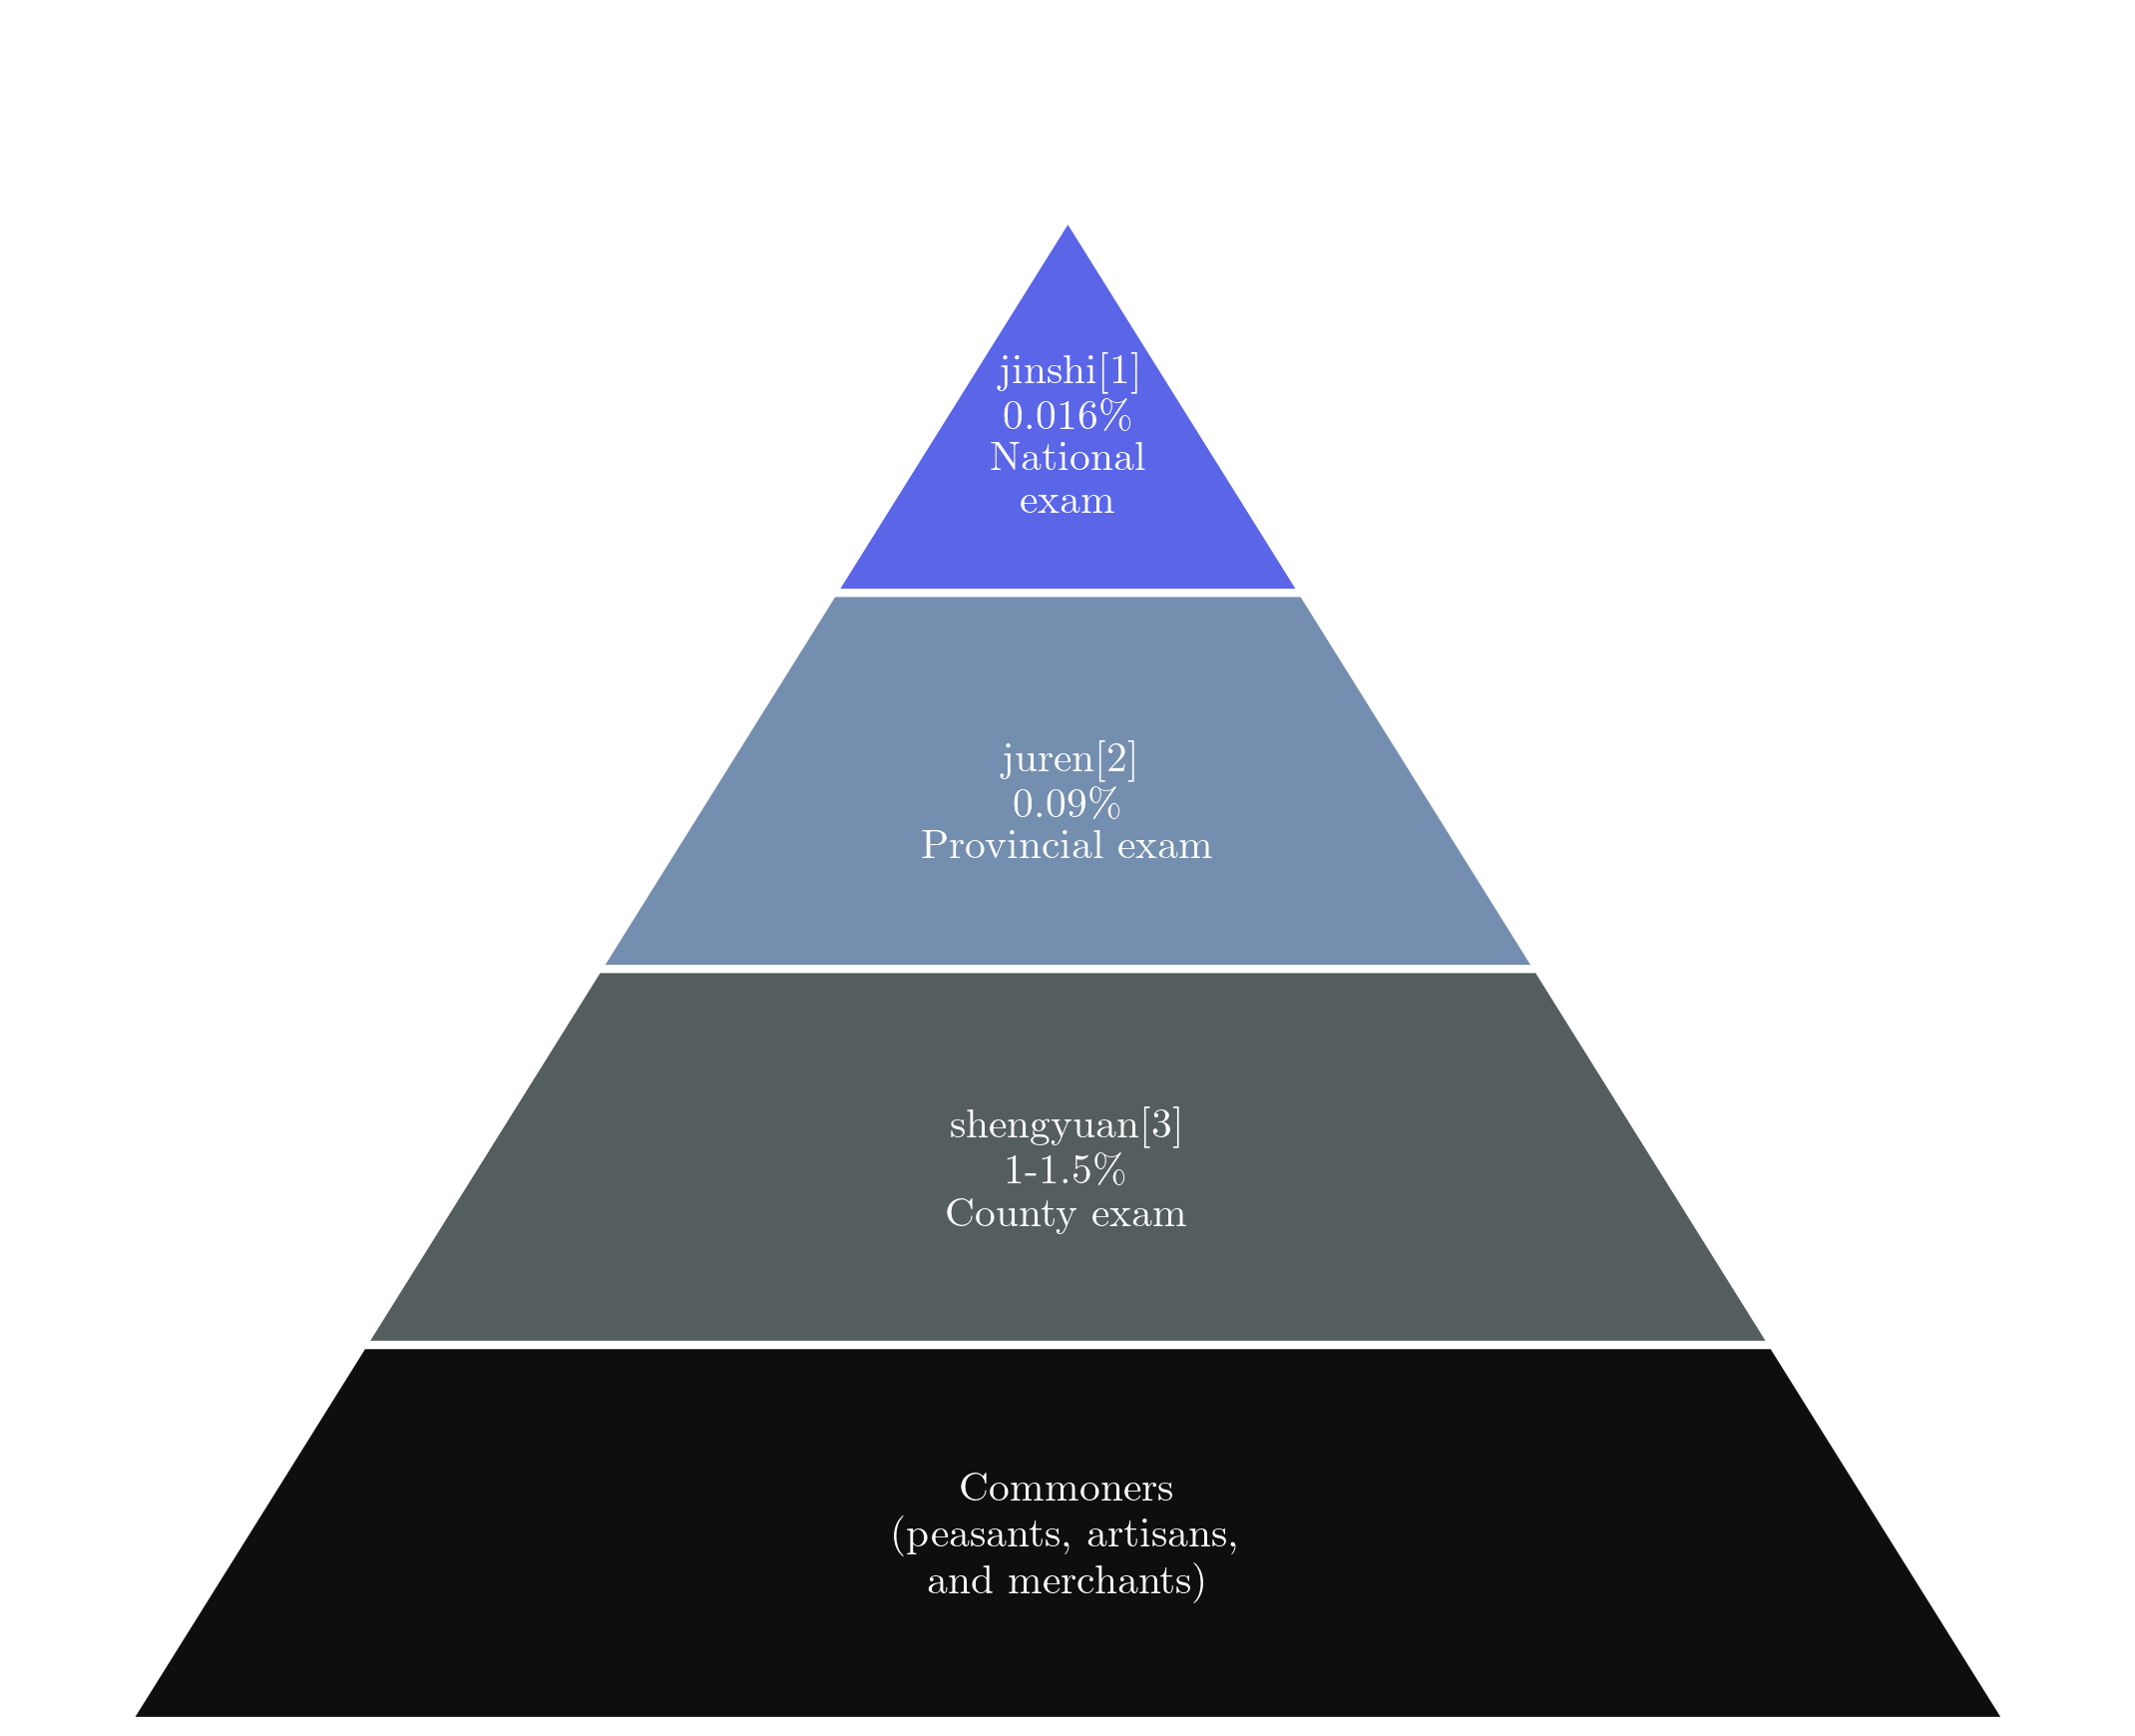

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(8,6), dpi=300)


levels = [
    ("jinshi[1]\n0.016\\%\nNational\nexam",              "#5a66e7"),  
    ("juren[2]\n0.09\\%\nProvincial exam",            "#748eaf"),
    ("shengyuan[3]\n1-1.5\\%\nCounty exam",            "#555E5F"),
    ("Commoners\n(peasants, artisans,\n and merchants)", "#0E0E0E"),  
]

n_levels = len(levels)
total_h = n_levels       
base_width = 5.0         

def half_width(y):
    return (1 - y / total_h) * (base_width / 2)

for i, (text, color) in enumerate(levels):

    y0 = total_h - (i + 1)  
    y1 = total_h - i        

    hw0 = half_width(y0)
    hw1 = half_width(y1)

    verts = [(-hw0, y0), (hw0, y0), (hw1, y1), (-hw1, y1)]
    poly = Polygon(verts, closed=True,
                   facecolor=color,
                   edgecolor="white",
                   linewidth=2)
    ax.add_patch(poly)


    ax.text(0, (y0 + y1) / 2.05, text,
            ha="center", va="center",
            fontsize=10, color="white")


ax.set_title("The Hierarchy (Degrees) of the Keju System",
             loc="Center", fontsize=14, color="White", pad=20)


ax.set_xlim(-base_width/2 - 0.3, base_width/2 + 0.3)
ax.set_ylim(0, total_h + 0.2)
ax.set_aspect("equal")
ax.axis("off")

plt.tight_layout()
plt.savefig("keju_hierarchy.png", dpi=500, transparent=True)
plt.show()


### Figure 1

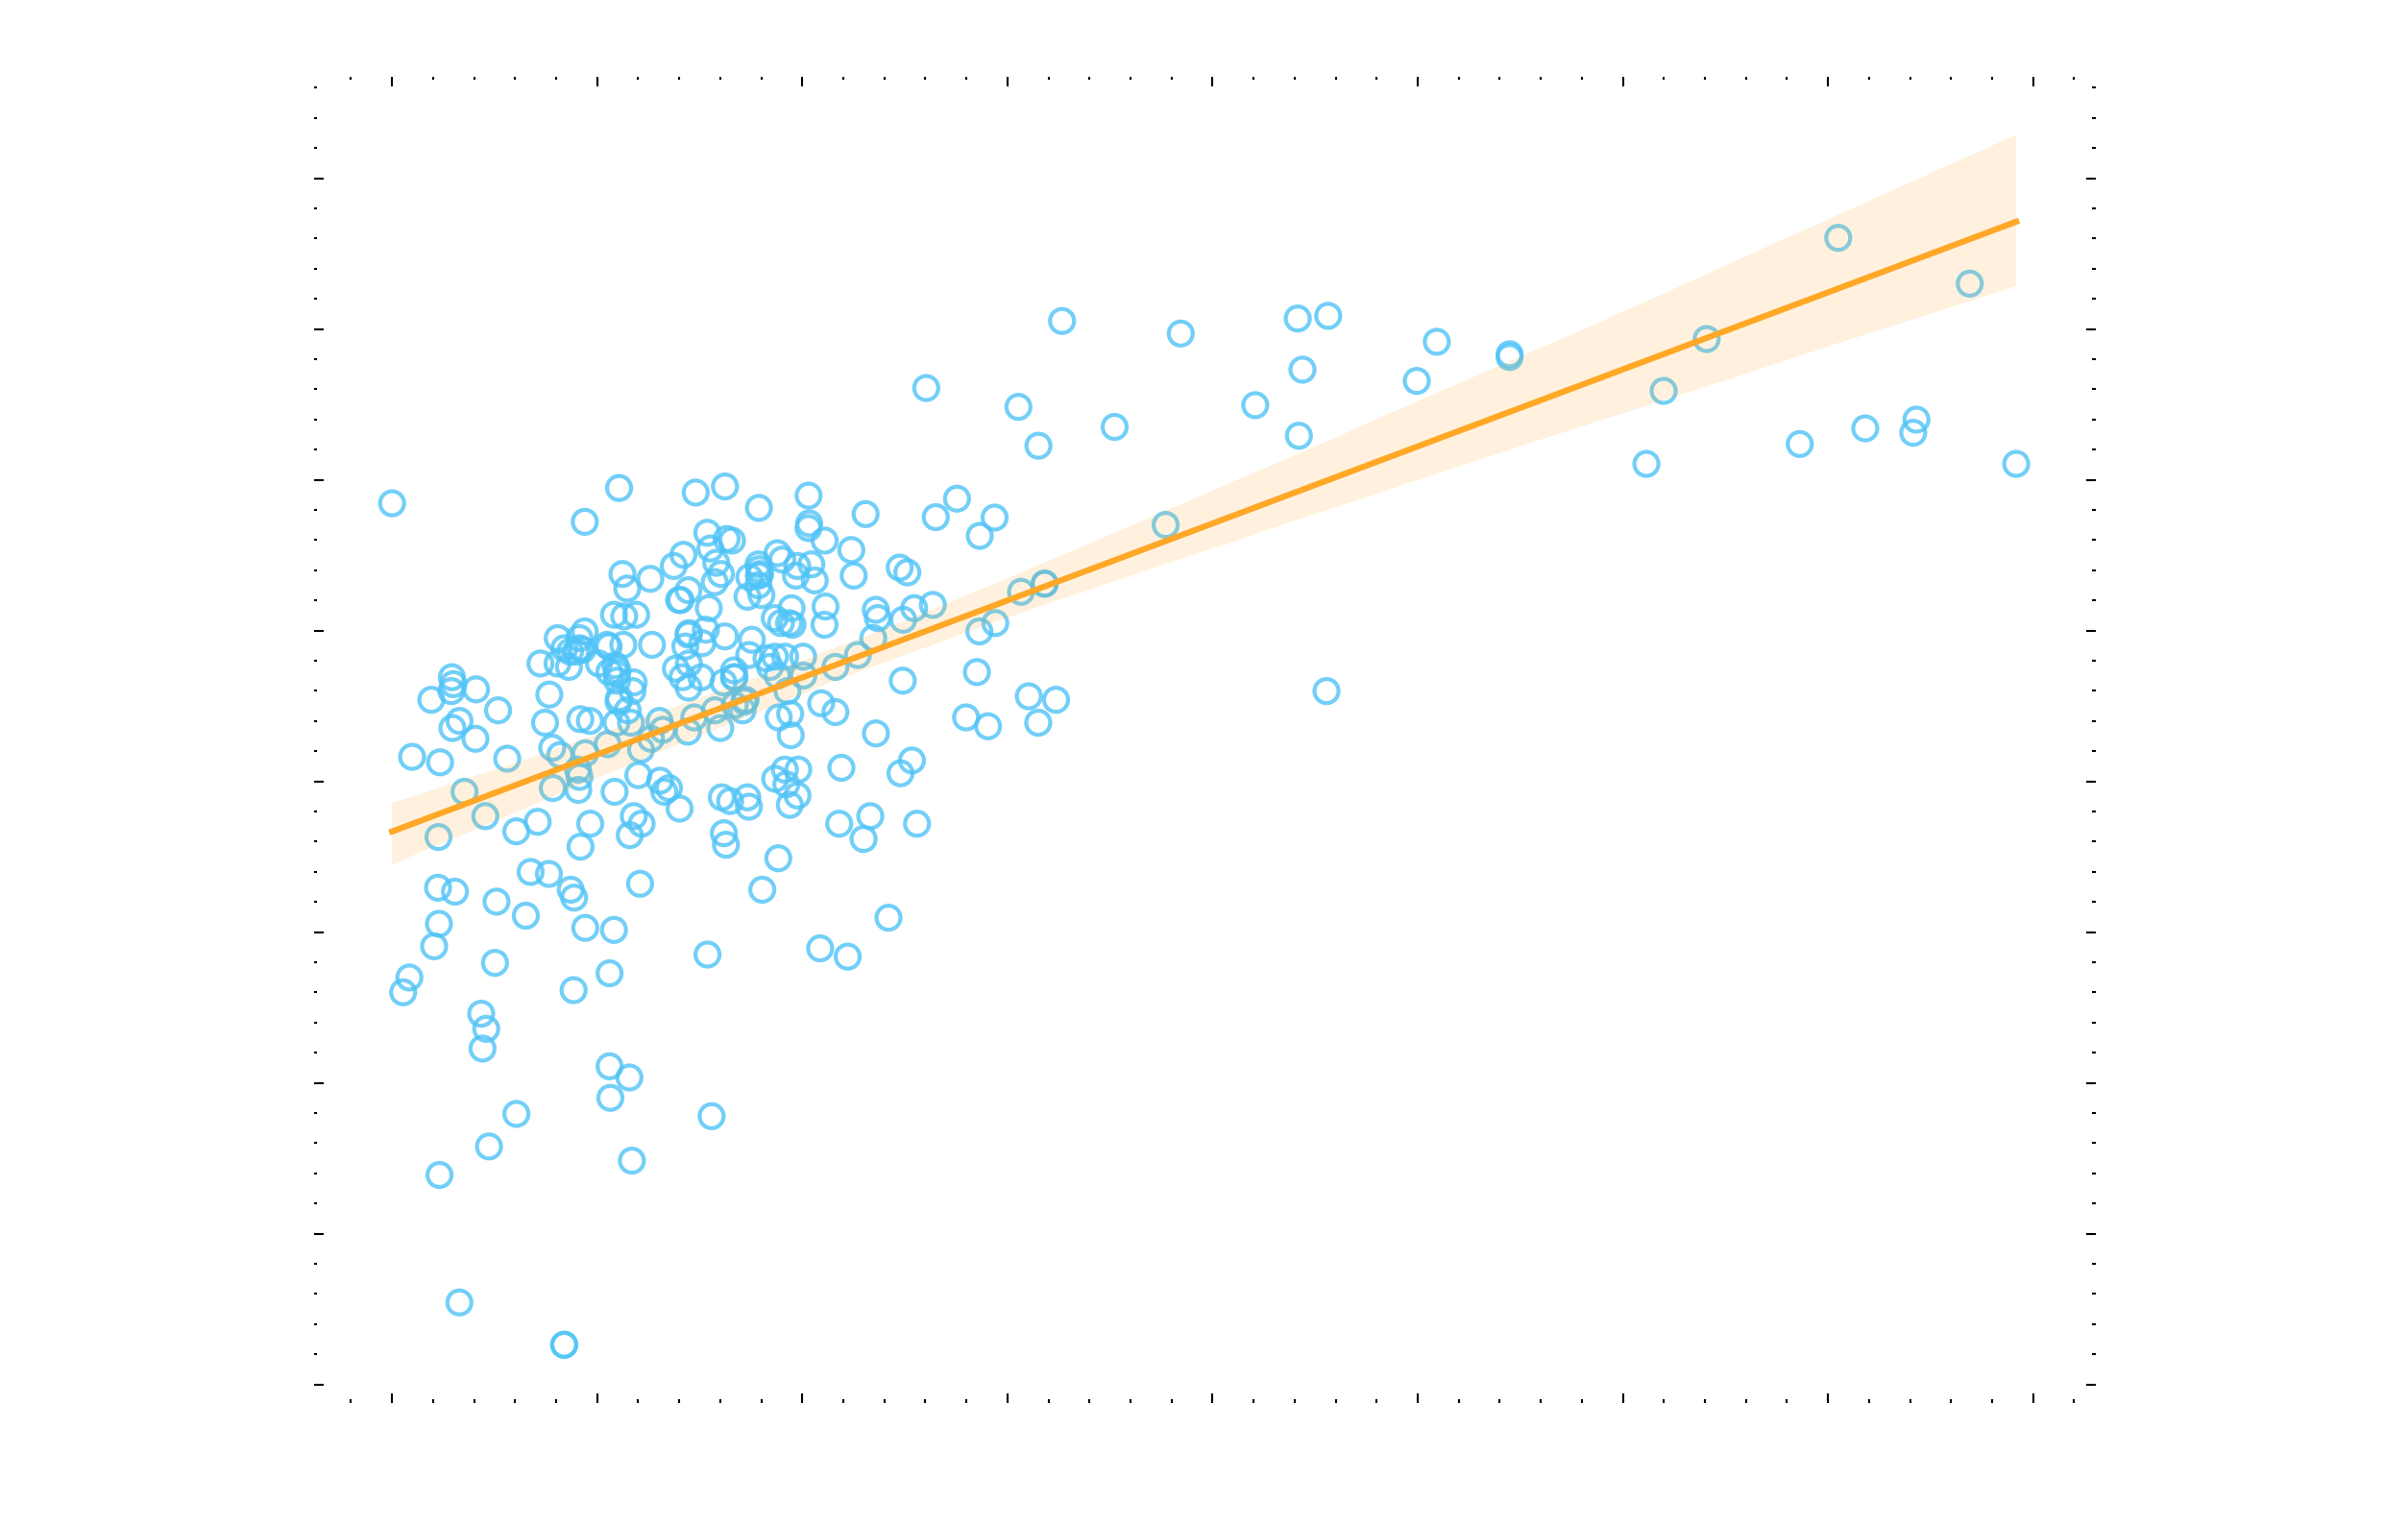

In [4]:
plt.figure(figsize=(8,6), dpi=300)
sns.regplot(y = census10["lneduyear"], x = census10["lnjinshipop"], scatter_kws = {"color": "#4FC3F780", "fc": "none"}, line_kws = {"color": "#FFA726"})
plt.title("Correlation between Historical Success in China's Civil Exam (Keju) and Contemporary Human Capital Outcomes.", color="white")
plt.xlabel("Jinshi[1] Density (Ming-Qing, Logged)", color="white") 
plt.ylabel("Average Year of Schooling (2010, Logged)", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.2)
plt.savefig("Replication_Figure1.png", dpi=300, transparent=True)
plt.show()

### Fig 2

In [5]:
lower_bound = figure2["Beta"] - figure2["cl"]
upper_bound = figure2["ch"] - figure2["Beta"]
errorbars = pd.DataFrame({"lower": lower_bound, "upper": upper_bound})

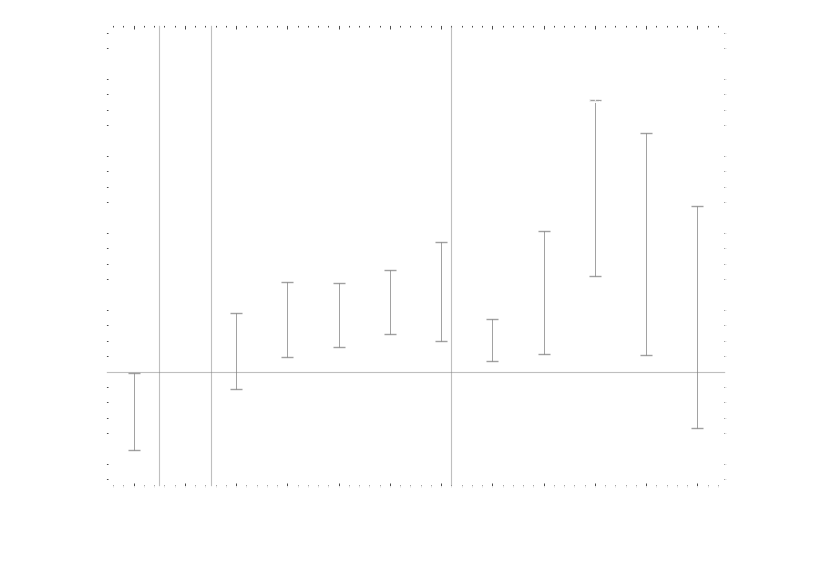

In [6]:
plt.figure(figsize=(8,6))

plt.plot(figure2["Beta"], marker='o', linestyle='-', color="white", lw=1)
plt.plot([0, 2], [figure2["Beta"][0], figure2["Beta"][2]], color="white", lw=1)

plt.errorbar(x=range(len(figure2["Beta"])), y=figure2["Beta"], yerr=[errorbars["lower"], errorbars["upper"]], fmt='none', ecolor="gray", elinewidth=0.7, capsize=4, alpha=0.75, ls="--")

plt.axhline(y=0, color="grey", lw=0.8, ls="-", alpha=0.5)
plt.axvline(x=0.5, color="grey", lw=0.8, ls="-", alpha=0.5)
plt.axvline(x=1.5, color="grey", lw=0.8, ls="-", alpha=0.5)
plt.axvline(x=6.2, color="grey", lw=0.8, ls="-", alpha=0.5)


labels = [
    "Song(960-1279)", "Yuan(1280-1368)", "1371-1450", "1451-1500", 
    "1501-1550", "1551-1600", "1601-1650", "1651-1700", 
    "1701-1750", "1751-1800", "1801-1850", "1851-1904"
]

plt.xticks(ticks=range(12), labels=labels, rotation=45, color="white")
plt.ylim(-0.15, 0.45)
plt.tick_params(axis='y', colors='white')
plt.title("Impact of Historical Success in China's Civil Exam (Keju) on Contemporary Human Capital Outcomes, by Period.", color="white")

plt.text(x=-0.3, y= 0.4, s="Song", fontsize=10, color="white")
plt.text(x=-0.5, y= 0.38, s="Dynasty", fontsize=9, color="white")

plt.text(x=0.65, y= 0.4, s="Yuan", fontsize=10, color="white")
plt.text(x=0.55, y= 0.38, s="Dynasty", fontsize=9, color="white")

plt.text(x=3.65, y= 0.4, s="Ming", fontsize=10, color="white")
plt.text(x=3.55, y= 0.38, s="Dynasty", fontsize=9, color="white")
plt.text(x=3.3, y= 0.35, s="(1368-1644)", fontsize=9, color="white")

plt.text(x=8.65, y= 0.4, s="Qing", fontsize=10, color="white")
plt.text(x=8.55, y= 0.38, s="Dynasty", fontsize=9, color="white")
plt.text(x=8.3, y= 0.35, s="(1644-1912)", fontsize=9, color="white")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.2)

plt.savefig("Replication_Figure2.png", dpi=500, transparent=True)
plt.show()

### Fig 3

In [7]:
qing_china = gpd.read_file(r"D:\Download\Microeconometrics\Replication\1_Replication Package\figure3\qing_china_proper.shp", use_arrow=True)
printing_centers = gpd.read_file(r"D:\Download\Microeconometrics\Replication\1_Replication Package\figure3\printing_centers.shp", use_arrow=True)
pine = gpd.read_file(r"D:\Download\Microeconometrics\Replication\1_Replication Package\figure3\pine.shp", use_arrow=True)
bamboo = gpd.read_file(r"D:\Download\Microeconometrics\Replication\1_Replication Package\figure3\bamboo.shp", use_arrow=True)
mainriver = gpd.read_file(r"D:\Download\Microeconometrics\Replication\1_Replication Package\figure3\MainRiver.shp", use_arrow=True)

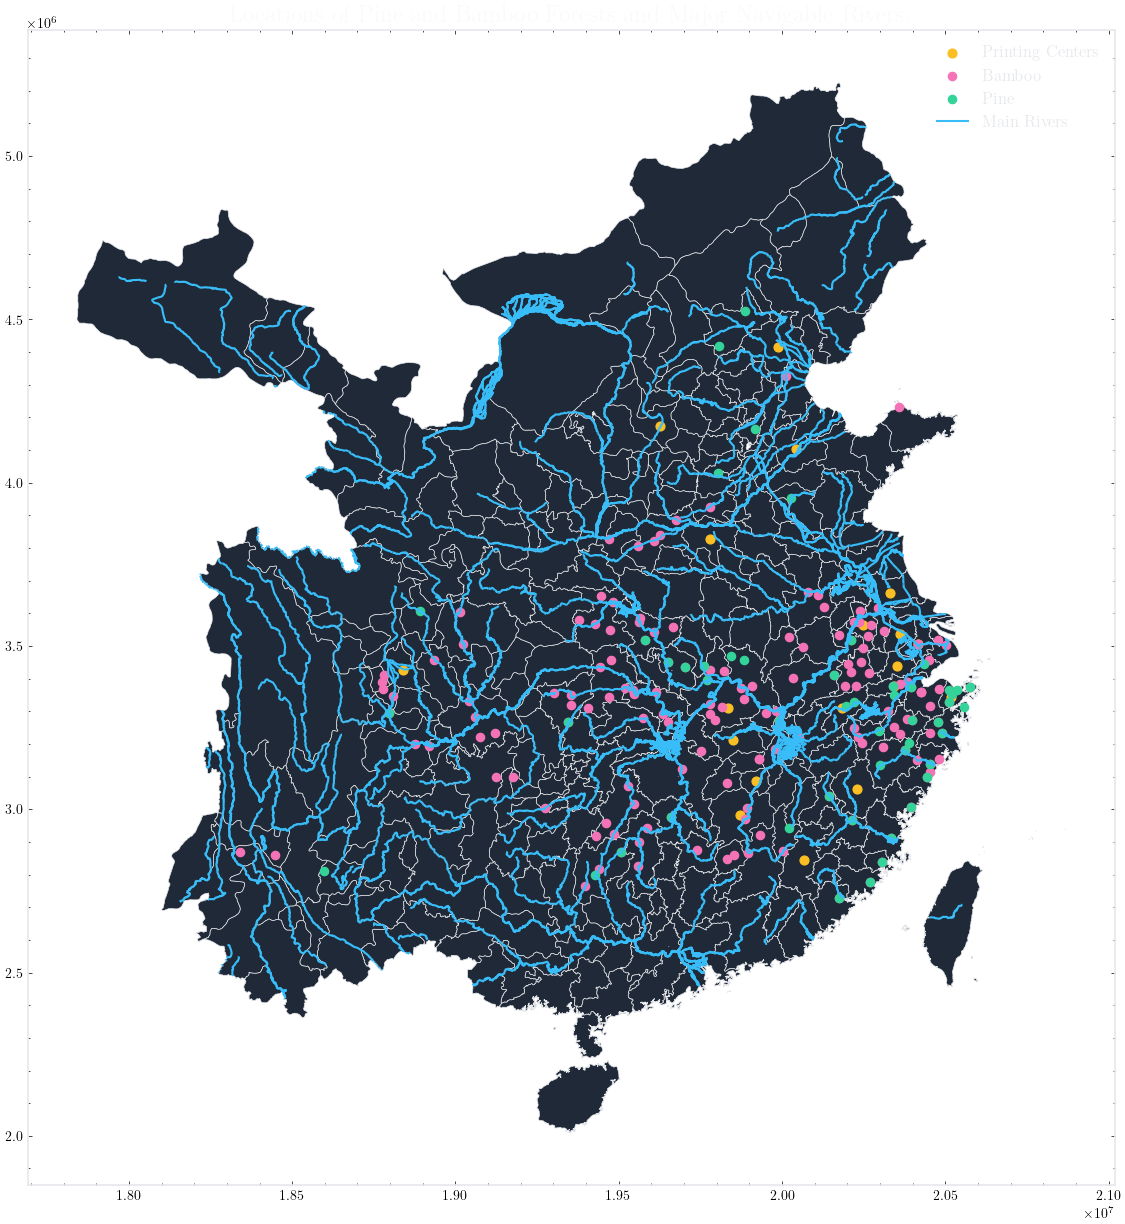

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))

mainriver = mainriver.to_crs(qing_china.crs)
pine = pine.to_crs(qing_china.crs)
bamboo = bamboo.to_crs(qing_china.crs)

# --- Dark Mode Colors (optimized) ---
background_color = "none"  # transparent figure background
china_face = "#1f2937"      # dark gray 800
china_edge = "#e5e7eb"      # gray 200
river_color = "#38bdf8"     # sky-400 (light cyan-blue)
bamboo_color = "#f472b6"    # pink-400
pine_color = "#34d399"      # emerald-400
print_center_color = "#fbbf24"  # amber-400

# --- Plot layers ---
qing_china.plot(ax=ax, color=china_face, edgecolor=china_edge, linewidth=0.5)

printing_centers.plot(
    ax=ax, color=print_center_color, markersize=40, label="Printing Centers"
)
bamboo.plot(
    ax=ax, color=bamboo_color, markersize=35, label="Bamboo"
)
pine.plot(
    ax=ax, color=pine_color, markersize=35, label="Pine"
)
mainriver.plot(
    ax=ax, color=river_color, linewidth=1.5, label="Main Rivers"
)

# --- Axis styling ---
ax = plt.gca()
ax.set_facecolor("none")  # transparent background

for spine in ax.spines.values():
    spine.set_color("#e5e7eb")     # light gray
    spine.set_linewidth(1.2)

# Title + legend
ax.set_title(
    "Locations of Pine and Bamboo Forests and Major Navigable Rivers.",
    color="#f9fafb",  # gray-50 (almost white)
    fontsize=18
)

legend = ax.legend(facecolor="#111827", edgecolor="#6b7280", fontsize=12)
plt.setp(legend.get_texts(), color="#e5e7eb")  # legend text color

# --- Save transparent for Slidev ---
plt.savefig("Replication_Figure3.png", dpi=500, transparent=True)
plt.show()


### Interact map

In [9]:
qing = qing_china.to_crs(epsg=4326)
pine_wgs = pine.to_crs(epsg=4326)
bamboo_wgs = bamboo.to_crs(epsg=4326)
river_wgs = mainriver.to_crs(epsg=4326)
printing_wgs = printing_centers.to_crs(epsg=4326)

qing_proj = qing.to_crs(epsg=3857)

centroids_proj = qing_proj.geometry.centroid

centroids_wgs = centroids_proj.to_crs(epsg=4326)


center = [
    centroids_wgs.y.mean(),
    centroids_wgs.x.mean()
]

m = folium.Map(
    location=center,
    zoom_start=5,
    tiles="cartodb dark_matter"  
)

fg_china = folium.FeatureGroup(name="Qing China", show=True)
folium.GeoJson(
    qing,
    style_function=lambda x: {
        "fillColor": "#1f2937",   
        "color": "#e5e7eb",       
        "weight": 1,
        "fillOpacity": 0.4,
    }
).add_to(fg_china)
fg_china.add_to(m)

fg_river = folium.FeatureGroup(name="Main Rivers", show=True)
folium.GeoJson(
    river_wgs,
    style_function=lambda x: {
        "color": "#38bdf8",  
        "weight": 2,
    }
).add_to(fg_river)
fg_river.add_to(m)

fg_bamboo = folium.FeatureGroup(name="Bamboo", show=True)
for _, row in bamboo_wgs.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=4,
        color="#f472b6",      # bamboo_color
        fill=True,
        fillOpacity=0.9,
        popup="Bamboo",
    ).add_to(fg_bamboo)
fg_bamboo.add_to(m)

fg_pine = folium.FeatureGroup(name="Pine", show=True)
for _, row in pine_wgs.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=4,
        color="#34d399",      # pine_color
        fill=True,
        fillOpacity=0.9,
        popup="Pine",
    ).add_to(fg_pine)
fg_pine.add_to(m)

fg_print = folium.FeatureGroup(name="Printing Centers", show=True)
for _, row in printing_wgs.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color="#fbbf24",      # print_center_color
        fill=True,
        fillOpacity=1.0,
        popup="Printing Center",
    ).add_to(fg_print)
fg_print.add_to(m)

folium.LayerControl(collapsed=False).add_to(m)
m.save("interactive_map_layer_control.html")


### Fig 4

In [10]:
lower_bound = figure4["Beta"] - figure4["cl"]
upper_bound = figure4["ch"] - figure4["Beta"]
errorbars = pd.DataFrame({"lower": lower_bound, "upper": upper_bound})

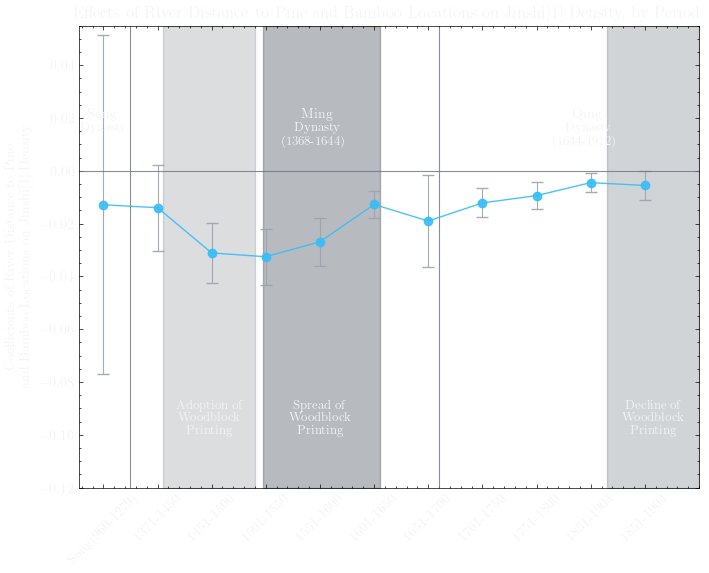

In [11]:
plt.figure(figsize=(8,6))

# Dark-mode optimized colors
point_color = "#38bdf8"      # sky-400
error_color = "#9ca3af"      # gray-400
axis_line = "#6b7280"        # gray-500
text_color = "#f3f4f6"       # gray-100
shade_light = "#4b5563"      # gray-600

plt.errorbar(
    x=range(len(figure4["Beta"])), 
    y=figure4["Beta"],
    yerr=[errorbars["lower"], errorbars["upper"]],
    fmt='o',
    ecolor=error_color,
    elinewidth=0.8,
    capsize=4,
    alpha=0.9,
    ls="-",
    color=point_color,
    markersize=6
)

# Lines
plt.axhline(y=0, color=axis_line, lw=0.8, ls="-", alpha=0.8)
plt.axvline(x=0.5, color=axis_line, lw=0.8, ls="-", alpha=0.8)
plt.axvline(x=6.2, color=axis_line, lw=0.8, ls="-", alpha=0.8)

# Ticks
labels = [
    "Song(960-1279)", "1371-1450", "1451-1500", 
    "1501-1550", "1551-1600", "1601-1650", "1651-1700", 
    "1701-1750", "1751-1800", "1851-1904", "1851-1904"
]

plt.xticks(ticks=range(11), labels=labels, rotation=45, color=text_color)
plt.yticks(color=text_color)

plt.xlim(-0.45, 11)
plt.ylim(-0.12, 0.055)

plt.title(
    "Effects of River Distance to Pine and Bamboo Locations on Jinshi[1] Density, by Period.",
    color=text_color
)
plt.ylabel(
    "Coefficients of River Distance to Pine \n and Bamboo Locations on Jinshi[1] Density",
    color=text_color
)

# Period labels
plt.text(-0.3, 0.02, "Song", fontsize=10, color=text_color)
plt.text(-0.425, 0.015, "Dynasty", fontsize=9, color=text_color)

plt.text(3.65, 0.02, "Ming", fontsize=10, color=text_color)
plt.text(3.525, 0.015, "Dynasty", fontsize=9, color=text_color)
plt.text(3.3, 0.01, "(1368-1644)", fontsize=9, color=text_color)

plt.text(8.65, 0.02, "Qing", fontsize=10, color=text_color)
plt.text(8.525, 0.015, "Dynasty", fontsize=9, color=text_color)
plt.text(8.3, 0.01, "(1644-1912)", fontsize=9, color=text_color)

# Shading sections
plt.fill_betweenx(
    y=[-0.12, 0.055],
    x1=1.1, x2=2.8,
    color=shade_light,
    alpha=0.2
)
plt.fill_betweenx(
    y=[-0.12, 0.055],
    x1=2.95, x2=5.1,
    color=shade_light,
    alpha=0.4
)
plt.fill_betweenx(
    y=[-0.12, 0.055],
    x1=9.3, x2=11,
    color=shade_light,
    alpha=0.25
)

# Text inside shaded regions
plt.text(1.95, -0.1, "Adoption of \n Woodblock \n Printing",
         fontsize=9, color=text_color, ha="center")
plt.text(4, -0.1, "Spread of \n Woodblock \n Printing",
         fontsize=9, color=text_color, ha="center")
plt.text(10.15, -0.1, "Decline of \n Woodblock \n Printing",
         fontsize=9, color=text_color, ha="center")

# Export PNG (for Slidev)
plt.savefig("Replication_Figure4.png", dpi=500, transparent=True)
plt.show()


## Online Appendix

### Fig A2

d:\miniforge3\envs\py314\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: One or several characters couldn't be converted correctly from gbk to UTF-8.  This warning will not be emitted anymore
  return ogr_read(


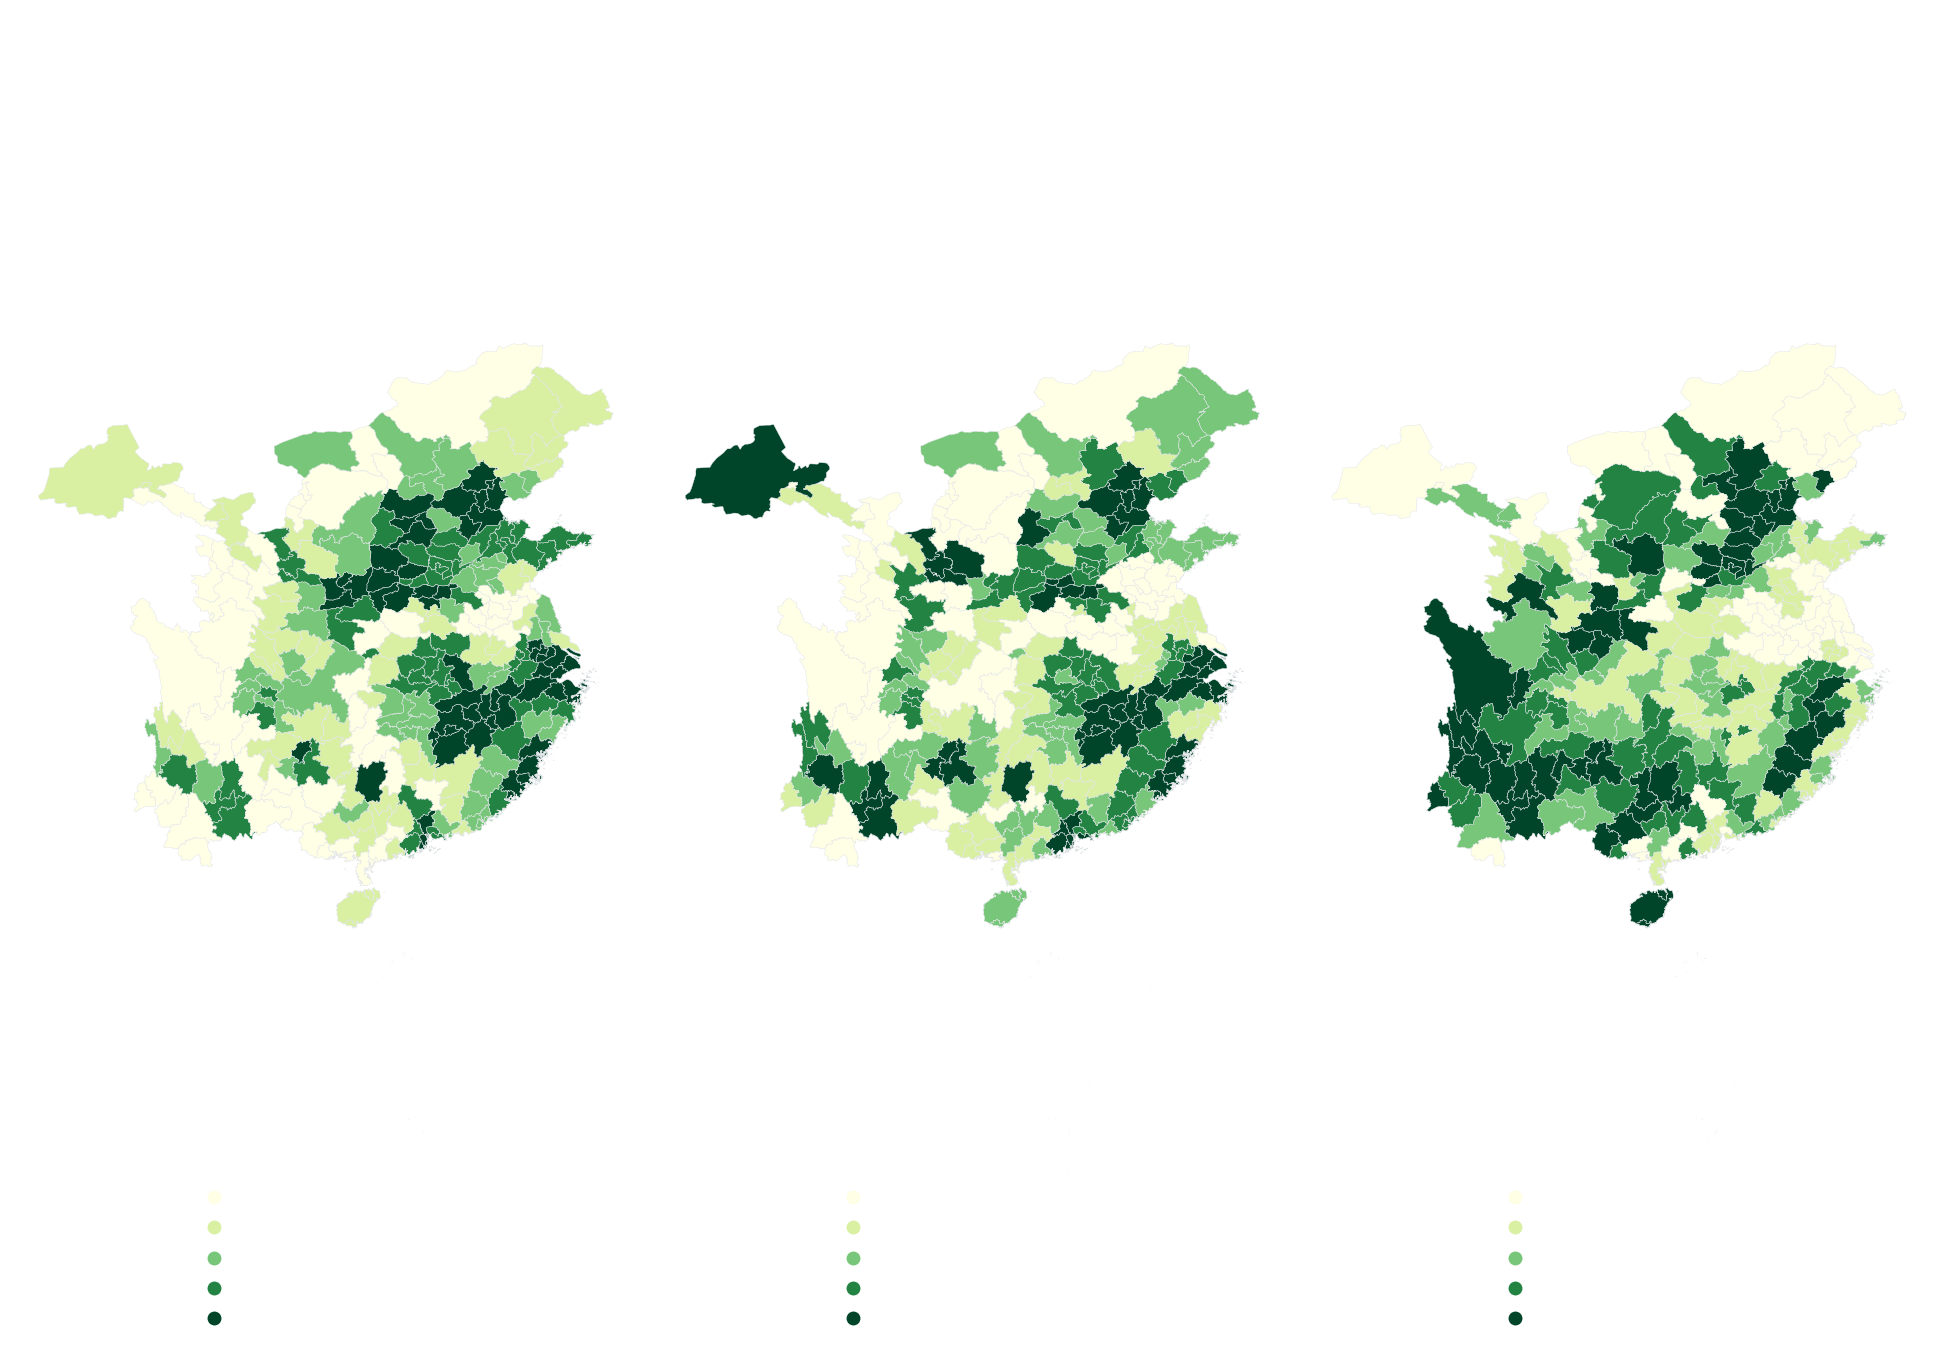

In [12]:
with plt.style.context('default'):

    gdf = gpd.read_file(
        r"D:\Download\Microeconometrics\Replication\1_Replication Package\figure_a2\figure_a2.shp",
        encoding="gbk"
    )

    cols = ["jinshipc", "jurenpc", "shengyuanp"]
    legend_titles = [
        "Jinshi[1] per 10,000 People\nin Ming-Qing Period",
        "Juren[2] per 10,000 People\nin Ming-Qing Period",
        "Shengyuan[3] Quota per\n10,000 People in the 180 Exams\nin Ming-Qing Period",
    ]
    fmts = ["%.3f", "%.3f", "%.0f"]

    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(1, 3)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    axes = [ax1, ax2, ax3]


    fig.patch.set_alpha(0.0)

    for ax, col, title, fmt in zip(axes, cols, legend_titles, fmts):
        ax.set_facecolor("none")

        classifier = mc.Quantiles(gdf[col], k=5)
        bins = classifier.bins
        labels = [f"{b_left:.3f} - {b_right:.3f}"
                for b_left, b_right in zip([classifier.y.min()] + list(bins[:-1]), bins)]

        gdf.plot(
            column=col,
            cmap="YlGn",          
            scheme="Quantiles",
            k=5,
            edgecolor="#e5e7eb", 
            linewidth=0.35,
            legend=True,
            legend_kwds={
                "title": title,
                "title_fontsize": 18,
                "fontsize": 15,
                "loc": "lower left",
                "bbox_to_anchor": (0.15, -0.15),
                "labels": labels,
                "frameon": False,  
            },
            ax=ax,
        )


        leg = ax.get_legend()
        if leg is not None:
            leg.get_frame().set_alpha(0.0)
            for text in leg.get_texts():
                text.set_color("white")
            leg.get_title().set_color("white")

        ax.set_axis_off()

    fig.suptitle(
        "Regional Distributions of Keju Degree Holders in the Ming-Qing Period",
        fontsize=30,
        color="white",   
    )

    plt.tight_layout()

    plt.savefig(
        "keju_regional_maps_dark.png",
        dpi=500,
        transparent=True
    )

    plt.show()
